In [1]:
import matplotlib.pyplot as plt

In [2]:
from tensorflow.keras.datasets import mnist 
(X_train, y_train), (X_test, y_test) = mnist.load_data() 
print(f'X_train shape: {X_train.shape}, X_test shape: {X_test.shape}') 



X_train shape: (60000, 28, 28), X_test shape: (10000, 28, 28)


In [3]:
from tensorflow.keras.utils import to_categorical 

# convert image datatype from integers to floats 
X_train = X_train.astype('float32') 
X_test = X_test.astype('float32') 

# normalising piel values 
X_train = X_train/255.0
X_test = X_test/255.0

# reshape images to add channel dimension 
X_train = X_train.reshape(X_train.shape[0], X_train.shape[1], X_train.shape[2], 1) 
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1], X_test.shape[2], 1) 

# One-hot encoding label 
y_train = to_categorical(y_train) 
y_test = to_categorical(y_test)


In [4]:
from tensorflow.keras.models import Sequential 
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten 

model = Sequential() 

# Layer 1 
# Conv 1 
model.add(Conv2D(filters=6, kernel_size=(5, 5), strides=1, activation = 'relu', input_shape = (28,28,1))) 
# Pooling 1 
model.add(MaxPooling2D(pool_size=(2, 2), strides = 2)) 

# Layer 2 
# Conv 2 
model.add(Conv2D(filters=16, kernel_size=(5, 5), strides=1, activation='relu')) 
# Pooling 2 
model.add(MaxPooling2D(pool_size = 2, strides = 2)) 

# Flatten 
model.add(Flatten()) 

# Layer 3 
# Fully connected layer 1 
model.add(Dense(units=120, activation='relu')) 

#Layer 4 
#Fully connected layer 2 
model.add(Dense(units=84, activation='relu')) 

#Layer 5 
#Output Layer 
model.add(Dense(units=10, activation='softmax')) 

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])


In [6]:
epochs = 20
batch_size = 512
history = model.fit(X_train, y_train, epochs=epochs, batch_size=batch_size, 
                    steps_per_epoch=X_train.shape[0]//batch_size, 
                    validation_data=(X_test, y_test), 
                    validation_steps=X_test.shape[0]//batch_size, verbose = 1) 

_, acc = model.evaluate(X_test, y_test, verbose = 1) 
print('%.3f' % (acc * 100.0)) 




Epoch 1/20
117/117 [==============================] - 3s 25ms/step - loss: 0.0731 - accuracy: 0.9778 - val_loss: 0.0573 - val_accuracy: 0.9813
Epoch 2/20
117/117 [==============================] - 3s 25ms/step - loss: 0.0610 - accuracy: 0.9805 - val_loss: 0.0654 - val_accuracy: 0.9777
Epoch 3/20
117/117 [==============================] - 3s 24ms/step - loss: 0.0554 - accuracy: 0.9826 - val_loss: 0.0480 - val_accuracy: 0.9838
Epoch 4/20
117/117 [==============================] - 3s 23ms/step - loss: 0.0479 - accuracy: 0.9845 - val_loss: 0.0420 - val_accuracy: 0.9879
Epoch 5/20
117/117 [==============================] - 3s 24ms/step - loss: 0.0430 - accuracy: 0.9859 - val_loss: 0.0412 - val_accuracy: 0.9867
Epoch 6/20
117/117 [==============================] - 3s 24ms/step - loss: 0.0389 - accuracy: 0.9879 - val_loss: 0.0380 - val_accuracy: 0.9878
Epoch 7/20
117/117 [==============================] - 3s 24ms/step - loss: 0.0382 - accuracy: 0.9880 - val_loss: 0.0364 - val_accuracy: 0.9889

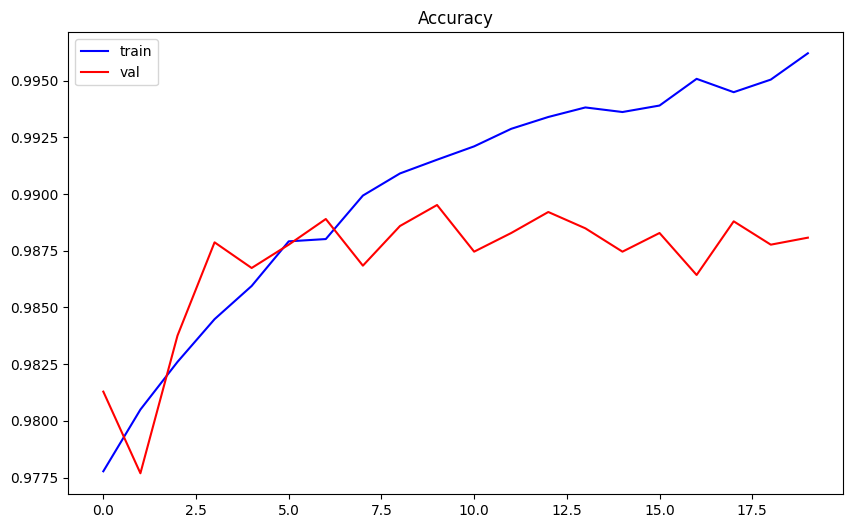

In [7]:
plt.figure(figsize=(10,6)) 
plt.plot(history.history['accuracy'], color = 'blue', label = 'train') 
plt.plot(history.history['val_accuracy'], color = 'red', label = 'val') 
plt.legend() 
plt.title('Accuracy') 
plt.show()